In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objects as go
import plotly
from textblob import TextBlob as tb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.interpolate import interp1d
import pandas as pd
import folium

from folium.plugins import HeatMap


('ee81ef22a22411ddb5e97f082c799f59', 17396)
(37, 2100)


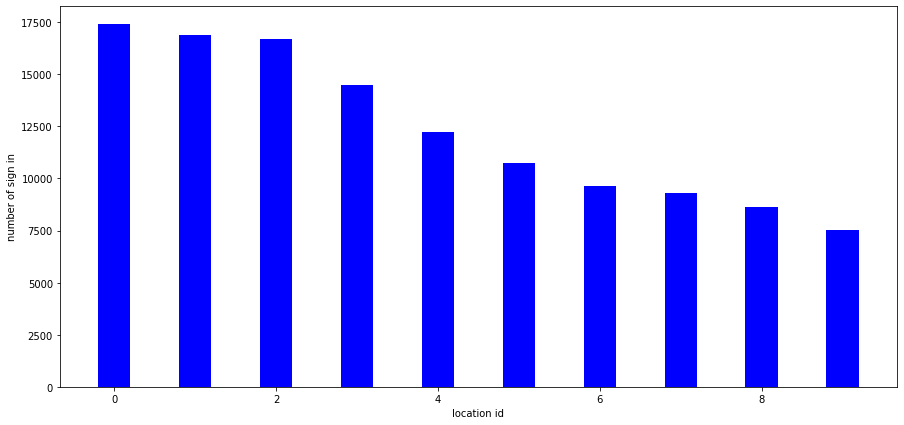

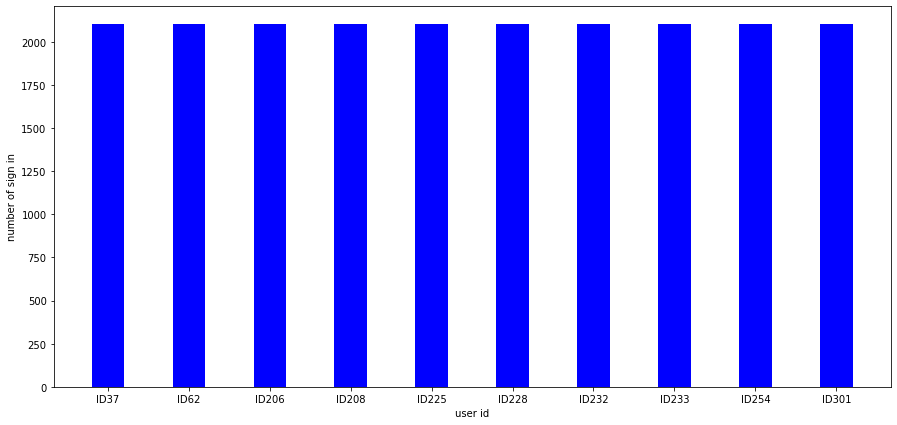

In [ ]:
checkin_dataset=pd.read_csv("/content/drive/MyDrive/psosm midsem/checkin.txt",delimiter='\s+',header=None)
checkin_dataset.columns=['user','check-in_time','latitude','longitude','location_id']
checkin_dataset=checkin_dataset[(checkin_dataset['latitude']!=0) & (checkin_dataset['longitude']!=0)]
Location=checkin_dataset.location_id.to_list()
countOfCheckinPerLocation={}
for i in Location:
  if i in countOfCheckinPerLocation.keys():
    countOfCheckinPerLocation[i]=countOfCheckinPerLocation[i]+1
  else:
    countOfCheckinPerLocation.setdefault(i,1)
sorted_countsList=sorted(countOfCheckinPerLocation.items(), key=lambda x: x[1],reverse=True)[:10]
print(sorted_countsList[0])
sorted_counts={}
for a, b in sorted_countsList:
  sorted_counts.setdefault(a, b)
fig=plt.figure(figsize=(15,7))
plt.bar(range(10),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("location id")
plt.ylabel("number of sign in")

# ii
countOfCheckinPerUser=dict()
for i in checkin_dataset['user']:
  if i in countOfCheckinPerUser.keys():
    countOfCheckinPerUser[i]=countOfCheckinPerUser[i]+1
  else:
    countOfCheckinPerUser.setdefault(i,1)
sorted_countsList=sorted(countOfCheckinPerUser.items(), key=lambda x: x[1],reverse=True)[:10]
sorted_counts={}
for a, b in sorted_countsList:
  sorted_counts.setdefault("ID"+str(a), b)
fig2=plt.figure(figsize=(15,7))
plt.bar(sorted_counts.keys(),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("user id")
plt.ylabel("number of sign in")
print(sorted_countsList[0])

In [ ]:
def generateBaseMap(default_location=[39.693943, -104.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
df=pd.read_csv("/content/drive/MyDrive/psosm midsem/checkin.txt",delimiter='\s+',header=None)
df.columns=['user','check-in_time','latitude','longitude','location_id']
df['count']=1
map=generateBaseMap()
HeatMap(data=df[['latitude', 'longitude','count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),radius=8,max_zoom=13).add_to(map)
map.save("geoheatmap.html")

In [ ]:
checkinLocation=checkin_dataset[checkin_dataset['location_id']=='ee81ef22a22411ddb5e97f082c799f59']
checkinLocation=checkinLocation['check-in_time']
checkin_dates={}
for i in checkinLocation:
    #print(i)
    h=str(i)[0:10]
    #h = dt.datetime.strptime(h, '%Y-%m-%d')
    if h in checkin_dates.keys():
      checkin_dates[h]=checkin_dates[h]+1
    else:
      checkin_dates.setdefault(h,1)
reqdatehour=pd.DataFrame({"date-hour": list(checkin_dates.keys()),"posts":list(checkin_dates.values())}).sort_values(["date-hour"],ascending=False)
fig = [go.Scatter(x=reqdatehour['date-hour'], y=reqdatehour['posts'])]
plotly.offline.iplot(fig)

In [ ]:
checkin37=checkin_dataset[checkin_dataset['user']==37]
checkin37=checkin37['check-in_time']
checkin_dates={}
for i in checkin37:
    h=str(i)[0:10]
    if h in checkin_dates.keys():
      checkin_dates[h]=checkin_dates[h]+1
    else:
      checkin_dates.setdefault(h,1)
reqdatehour=pd.DataFrame({"date-hour": list(checkin_dates.keys()),"posts":list(checkin_dates.values())}).sort_values(["date-hour"],ascending=False)
fig = [go.Scatter(x=reqdatehour['date-hour'], y=reqdatehour['posts'])]
plotly.offline.iplot(fig)